In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import pystan
plt.style.use('ggplot')

In [2]:
hits_code = """

data {
    int<lower=0> visits; // number of visits
    int<lower=0> hits; // number of hits
}

transformed data{}

parameters {
    real<lower=0, upper=1> p; // probability of hits
}

transformed parameters{}

model {
    p ~ uniform(2, 2);
    hits ~ binomial(visits, p);
}

generated quantities {}
"""

A_data = {
    'visits': 1058,
    'hits': 52,
}

B_data = {
    'visits': 1470,
    'hits': 112,
}

A_fit = pystan.stan(model_code=hits_code, data=A_data, iter=1000, chains=1)
B_fit = pystan.stan(model_code=hits_code, data=B_data, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e32dcbd153af831b89c58fa68b10ce99 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e32dcbd153af831b89c58fa68b10ce99 NOW.


In [3]:
print(A_fit)

Inference for Stan model: anon_model_e32dcbd153af831b89c58fa68b10ce99.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.05  4.7e-4 6.8e-3   0.04   0.05   0.05   0.05   0.07    209    1.0
lp__ -210.9    0.05   0.76 -213.3 -211.1 -210.6 -210.4 -210.4    194    1.0

Samples were drawn using NUTS at Sat Mar 18 17:13:14 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [4]:
print(B_fit)

Inference for Stan model: anon_model_e32dcbd153af831b89c58fa68b10ce99.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.08  3.6e-4 6.5e-3   0.07   0.07   0.08   0.08   0.09    315    1.0
lp__ -399.0    0.03   0.64 -400.8 -399.1 -398.8 -398.6 -398.6    340    1.0

Samples were drawn using NUTS at Sat Mar 18 17:13:48 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


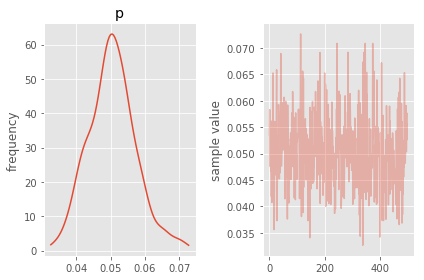

In [5]:
A_fit.plot('p');
plt.tight_layout()

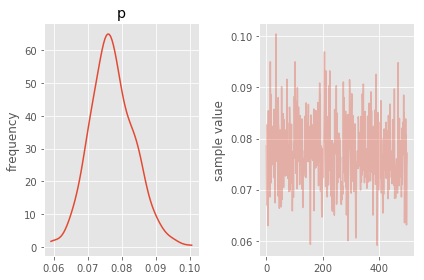

In [6]:
B_fit.plot('p');
plt.tight_layout()

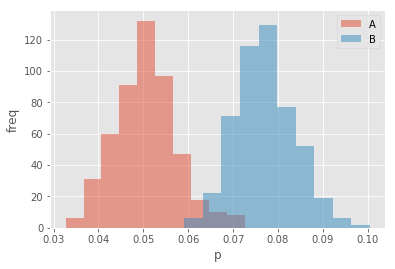

In [7]:
plt.hist(A_fit.extract('p')['p'], alpha=0.5, label='A')
plt.hist(B_fit.extract('p')['p'], alpha=0.5, label='B')
plt.xlabel('p')
plt.ylabel('freq')
plt.legend(loc='upper right')